# Importing the libraries

In [26]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Defining the VGG Face model

In [27]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Loading pretrained weights of VGGFace model

In [28]:
model.load_weights('../input/vggfaceweights/vgg_face_weights.h5')

# VGG Face image preprocessing

In [29]:
def preprocess_image(image_path):
    img = load_img(image_path,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img

def find_cosine_similarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation),test_representation)
    b = np.sum(np.multiply(source_representation,source_representation))
    c = np.sum(np.multiply(test_representation,test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

vgg_face_descriptor = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

## **Verify Facial Similarity**

#### **Define our verifyFace function where we load to images of faces and compare them.**

In [30]:
epsilon = 0.4

def verify_face(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('../input/5-celebrity-faces-dataset/train/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('../input/5-celebrity-faces-dataset/train/%s' % (img2)))[0,:]
    cosine_similarity = find_cosine_similarity(img1_representation,img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(image.load_img('../input/5-celebrity-faces-dataset/train/%s' % (img1)))
    plt.xticks([]);plt.yticks([])
    f.add_subplot(1,2,2)
    plt.imshow(image.load_img('../input/5-celebrity-faces-dataset/train/%s' % (img2)))
    plt.xticks([]);plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

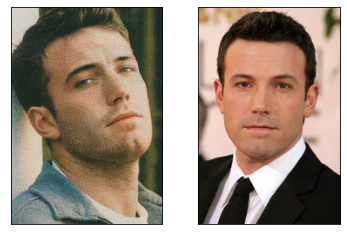

Cosine similarity:  0.2831953167915344
They are same person


In [31]:
# ../input/5-celebrity-faces-dataset/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
verify_face("ben_afflek/httpwwwhillsindcomstorebenjpg.jpg","ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg")

In [32]:
import cv2

In [33]:
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

In [34]:
def imshow(title="Image",image=None,size=8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [35]:
import os
from os import listdir
from os.path import isfile, join

# Loading HAARCascade Face Detector to fetch face from images

In [36]:
# Loading out HAARCascade Face Detector
face_detector = cv2.CascadeClassifier("../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml")
path_list = ["../input/5-celebrity-faces-dataset/train/ben_afflek/", 
#              "../input/5-celebrity-faces-dataset/train/elton_john/",
             "../input/5-celebrity-faces-dataset/train/jerry_seinfeld/",
             "../input/5-celebrity-faces-dataset/train/madonna/",
             "../input/5-celebrity-faces-dataset/train/mindy_kaling/"            
            ]

In [37]:
celeb_list = ["ben_afflek",
#               "elton_john",
              "jerry_seinfold","madonna","mindy_kaling"]
image_file_names = []
for dir_path in path_list:
    f = listdir(dir_path)[0]
    print(dir_path)
    print(join(dir_path,f))
    if isfile(join(dir_path,f)):
        image_file_names.append(f)

../input/5-celebrity-faces-dataset/train/ben_afflek/
../input/5-celebrity-faces-dataset/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
../input/5-celebrity-faces-dataset/train/jerry_seinfeld/
../input/5-celebrity-faces-dataset/train/jerry_seinfeld/httpwwwpictureszimbiocomgpJerrySeinfeldJessicaSeinfeldmarriedBczSipMdNMQljpg.jpg
../input/5-celebrity-faces-dataset/train/madonna/
../input/5-celebrity-faces-dataset/train/madonna/httpssmediacacheakpinimgcomxffecfafddjpg.jpg
../input/5-celebrity-faces-dataset/train/mindy_kaling/
../input/5-celebrity-faces-dataset/train/mindy_kaling/httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg


In [38]:
image_file_names[0]

'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg'

In [39]:
import shutil
try:
    shutil.rmtree("./group_of_faces/")
except:
    pass

# Fetching Faces and storing them for comparison

Collected 4 images


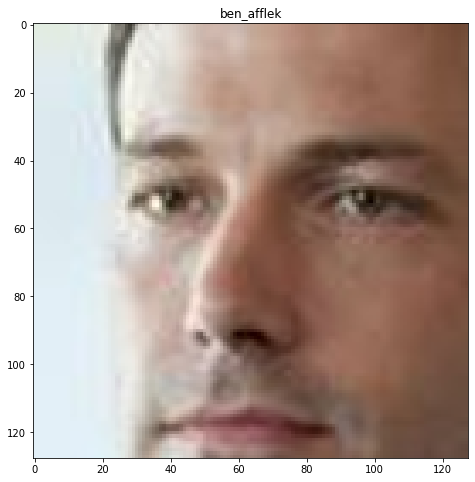

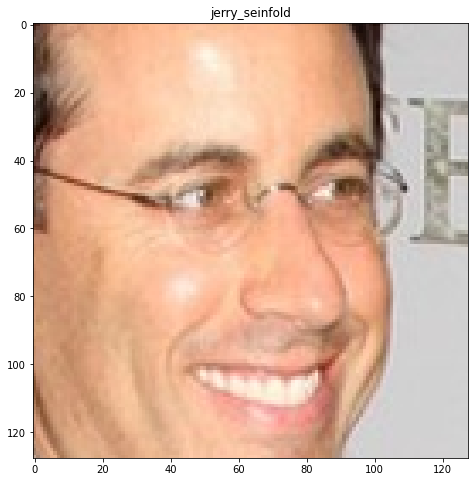

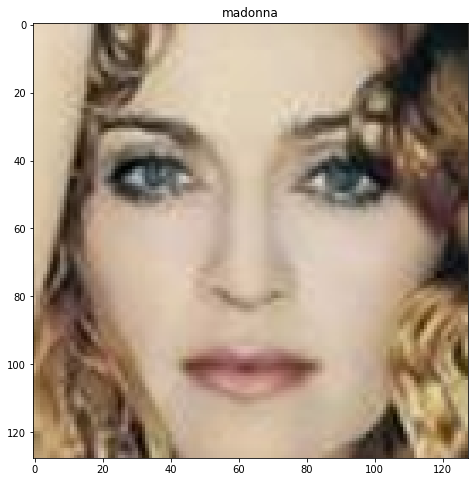

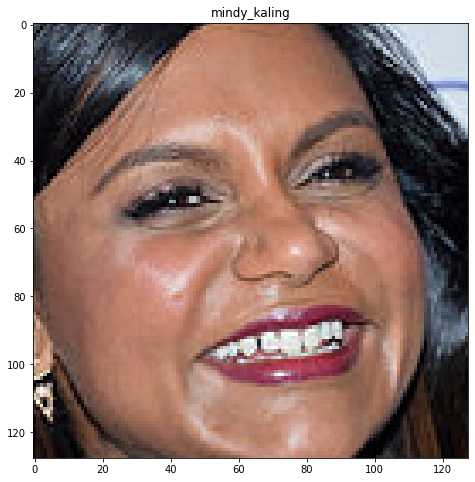

In [40]:
print("Collected " + str(len(image_file_names)) + " images")
makedir("./group_of_faces/")

for i,(image_name,celeb_name, path_name) in enumerate(zip(image_file_names,celeb_list,path_list)):
    person_image = cv2.imread(join(path_name,image_name))
#     plt.imshow(cv2.cvtColor(person_image,cv2.COLOR_BGR2RGB))
    face_detector = cv2.CascadeClassifier("../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml")
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)

        path = "./group_of_faces/" + "face_" + f"{celeb_name}.jpg" 
        cv2.imwrite(path, roi)
    face_info = None
    imshow(f"{celeb_name}", roi)

# Making Predictions with another image

In [41]:
#points to your extracted faces
people_pictures = "./group_of_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
        all_people_faces[person_face] = model.predict(preprocess_image('./group_of_faces/%s.jpg' % (person_face)))[0,:]
    except:
        pass

print("Face representations retrieved successfully")

Face representations retrieved successfully


**Downloading image from website**

In [42]:
!wget https://variety.com/wp-content/uploads/2017/09/ben_affleck.png

--2023-09-24 18:55:55--  https://variety.com/wp-content/uploads/2017/09/ben_affleck.png
Resolving variety.com (variety.com)... 192.0.66.176
Connecting to variety.com (variety.com)|192.0.66.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303584 (296K) [image/png]
Saving to: ‘ben_affleck.png.2’

ben_affleck.png.2   100%[===================>] 296.47K  --.-KB/s    in 0.1s    

2023-09-24 18:55:55 (2.59 MB/s) - ‘ben_affleck.png.2’ saved [303584/303584]



In [45]:
img = cv2.imread("/kaggle/input/5-celebrity-faces-dataset/val/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg")
faces = face_detector.detectMultiScale(img,1.3,5)

0.8905624896287918
0.772543266415596
0.9010677188634872
0.6389598846435547


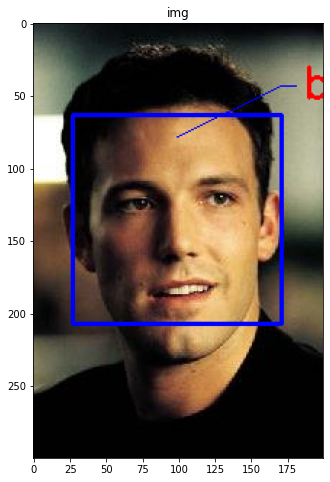

In [46]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
    detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    captured_representation = model.predict(img_pixels)[0,:]

    found = 0
    for i in all_people_faces:
        person_name = i
        representation = all_people_faces[i]

        similarity = find_cosine_similarity(representation, captured_representation)
        print(similarity)
        if(similarity < 0.65):
            cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            found = 1
            break

    #connect face and text
    cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
    cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    if(found == 0): #if found image is not in our people database
        cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

imshow('img',img)